In [1]:
from prophet import Prophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('rossmann_train.csv', low_memory=False)

In [3]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


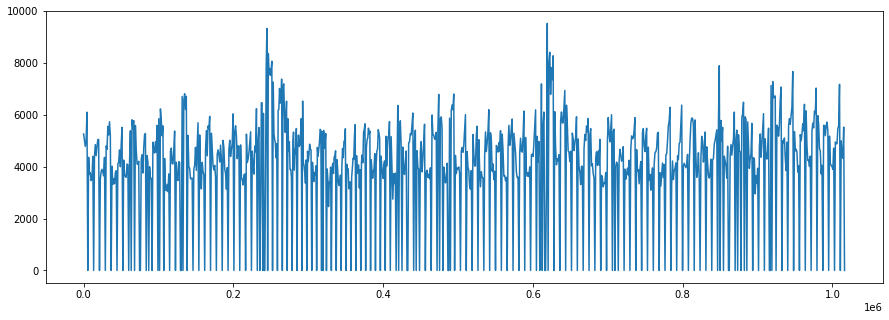

In [4]:
df[df['Store'] == 1]['Sales'].plot(figsize=(15, 5));

In [5]:
(df[df['Store'] == 1]['Sales'] == 0).sum()


161

In [6]:
store1 = df[df['Store'] == 1].copy()


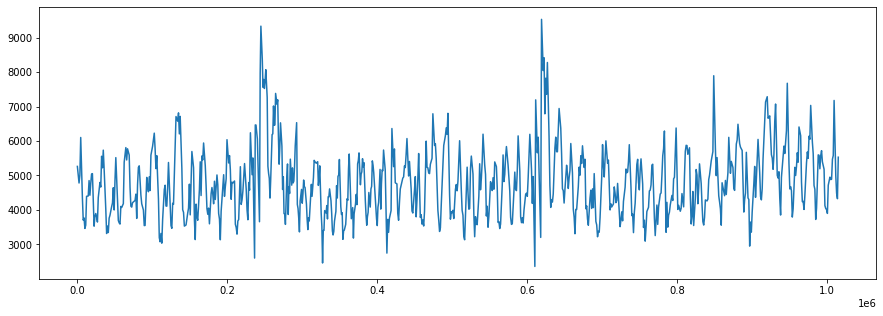

In [7]:
store1[store1['Open'] > 0]['Sales'].plot(figsize=(15, 5));

In [8]:
sales0 = store1[store1['Sales'] == 0].index
customers0 = store1[store1['Customers'] == 0].index
store_closed = store1[store1['Open'] == 0].index
print(np.all(sales0 == customers0))
print(np.all(store_closed == customers0))

True
True


In [9]:
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [10]:
store1['Date'] = pd.to_datetime(store1['Date'])

In [11]:
store1.set_index('Date', inplace=True)

In [12]:
store1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


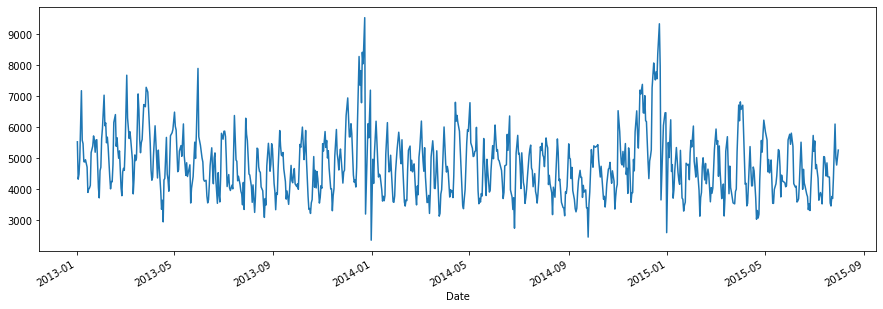

In [13]:
store1[store1['Customers'] > 0]['Sales'].plot(figsize=(15, 5));

In [14]:
df_p = store1[['Sales']].copy()
df_p['Date'] = df_p.index
df_p.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [15]:
df_p.sort_index(inplace=True)
df_p.head(20)

,Sales,Date
Date,,
2013-01-01,0,2013-01-01
2013-01-02,5530,2013-01-02
2013-01-03,4327,2013-01-03
2013-01-04,4486,2013-01-04
2013-01-05,4997,2013-01-05
2013-01-06,0,2013-01-06
2013-01-07,7176,2013-01-07
2013-01-08,5580,2013-01-08
2013-01-09,5471,2013-01-09


In [16]:
df_p.tail()

,Sales,Date
Date,,
2015-07-27,6102,2015-07-27
2015-07-28,5011,2015-07-28
2015-07-29,4782,2015-07-29
2015-07-30,5020,2015-07-30
2015-07-31,5263,2015-07-31


In [17]:
df_p.columns = ['y', 'ds']
m = Prophet()
m.fit(df_p)

15:57:21 - cmdstanpy - INFO - Chain [1] start processing
15:57:21 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [19]:
future.tail()

,ds
1302,2016-07-26
1303,2016-07-27
1304,2016-07-28
1305,2016-07-29
1306,2016-07-30


In [20]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1302,2016-07-26,3747.516680,2991.767356,5894.779110,3717.603660,3779.581587,713.787322,713.787322,713.787322,706.247293,706.247293,706.247293,7.540029,7.540029,7.540029,0.0,0.0,0.0,4461.304002
1303,2016-07-27,3747.320187,2799.611408,5722.167354,3717.252062,3779.494942,503.023234,503.023234,503.023234,510.491956,510.491956,510.491956,-7.468722,-7.468722,-7.468722,0.0,0.0,0.0,4250.343421
1304,2016-07-28,3747.123695,2446.228444,5485.716160,3716.900465,3779.408296,127.148498,127.148498,127.148498,151.257953,151.257953,151.257953,-24.109455,-24.109455,-24.109455,0.0,0.0,0.0,3874.272193
1305,2016-07-29,3746.927202,2757.905380,5723.670219,3716.548868,3779.317278,531.580814,531.580814,531.580814,573.629403,573.629403,573.629403,-42.048589,-42.048589,-42.048589,0.0,0.0,0.0,4278.508016
1306,2016-07-30,3746.730709,3170.164200,6104.006719,3716.197271,3779.226029,938.165053,938.165053,938.165053,999.097003,999.097003,999.097003,-60.931950,-60.931950,-60.931950,0.0,0.0,0.0,4684.895762


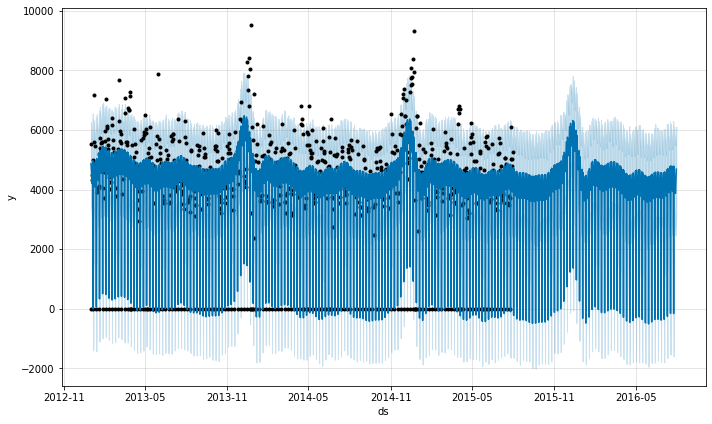

In [22]:
m.plot(forecast);